In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\user\\Downloads\\shows.csv")
data

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [2]:
df=pd.DataFrame(data)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [3]:
df["Nationality"]=df["Nationality"].replace({"UK":0,"USA":1,"N":2})
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,NO
1,42,12,4,1,NO
2,23,4,6,2,NO
3,52,4,4,1,NO
4,43,21,8,1,YES
5,44,14,5,0,NO
6,66,3,7,2,YES
7,35,14,9,0,YES
8,52,13,7,2,YES
9,35,5,9,2,YES


In [4]:
X=df[["Age","Experience","Rank","Nationality"]]
X

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [5]:
Y=df['Go']
Y

0      NO
1      NO
2      NO
3      NO
4     YES
5      NO
6     YES
7     YES
8     YES
9     YES
10     NO
11    YES
12    YES
Name: Go, dtype: object

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
dtree=DecisionTreeClassifier()
dtree.fit(X,Y)

DecisionTreeClassifier()

In [8]:
data=tree.export_graphviz(dtree,feature_names=X.columns)

In [9]:
data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Rank <= 6.5\\ngini = 0.497\\nsamples = 13\\nvalue = [6, 7]"] ;\n1 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Nationality <= 0.5\\ngini = 0.219\\nsamples = 8\\nvalue = [1, 7]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Experience <= 9.5\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n3 -> 4 ;\n5 [label="Experience <= 12.0\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;\n2 -> 8 ;\n}'

In [10]:
import pydotplus
import graphviz
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

In [11]:
graph=pydotplus.graph_from_dot_data(data)

In [12]:
graph.write_png('decision_tree.png')

True

In [13]:
img=pltimg.imread('decision_tree.png')

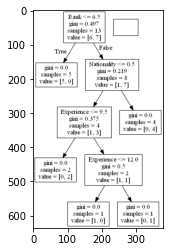

In [21]:
plt.imshow(img)

In [15]:
dtree.predict([[40,10,8,1]])

array(['YES'], dtype=object)